# Titanic survival prediction

In [195]:
import os
import pandas as pd
test_label_name = "gender_submission.csv"
test_data_name = "test.csv"
train_data_name = "train.csv"

def fetch_data(path):
    csv_path = os.path.join("titanic", path) 
    return pd.read_csv(csv_path)

In [196]:
X_train = fetch_data(train_data_name)
X_test = fetch_data(test_data_name)
X_test = pd.DataFrame(X_test)
y_test = fetch_data(test_data_name)

In [197]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
X_train = X_train.set_index("PassengerId")
X_test = X_test.set_index("PassengerId")


C:\Users\jeanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

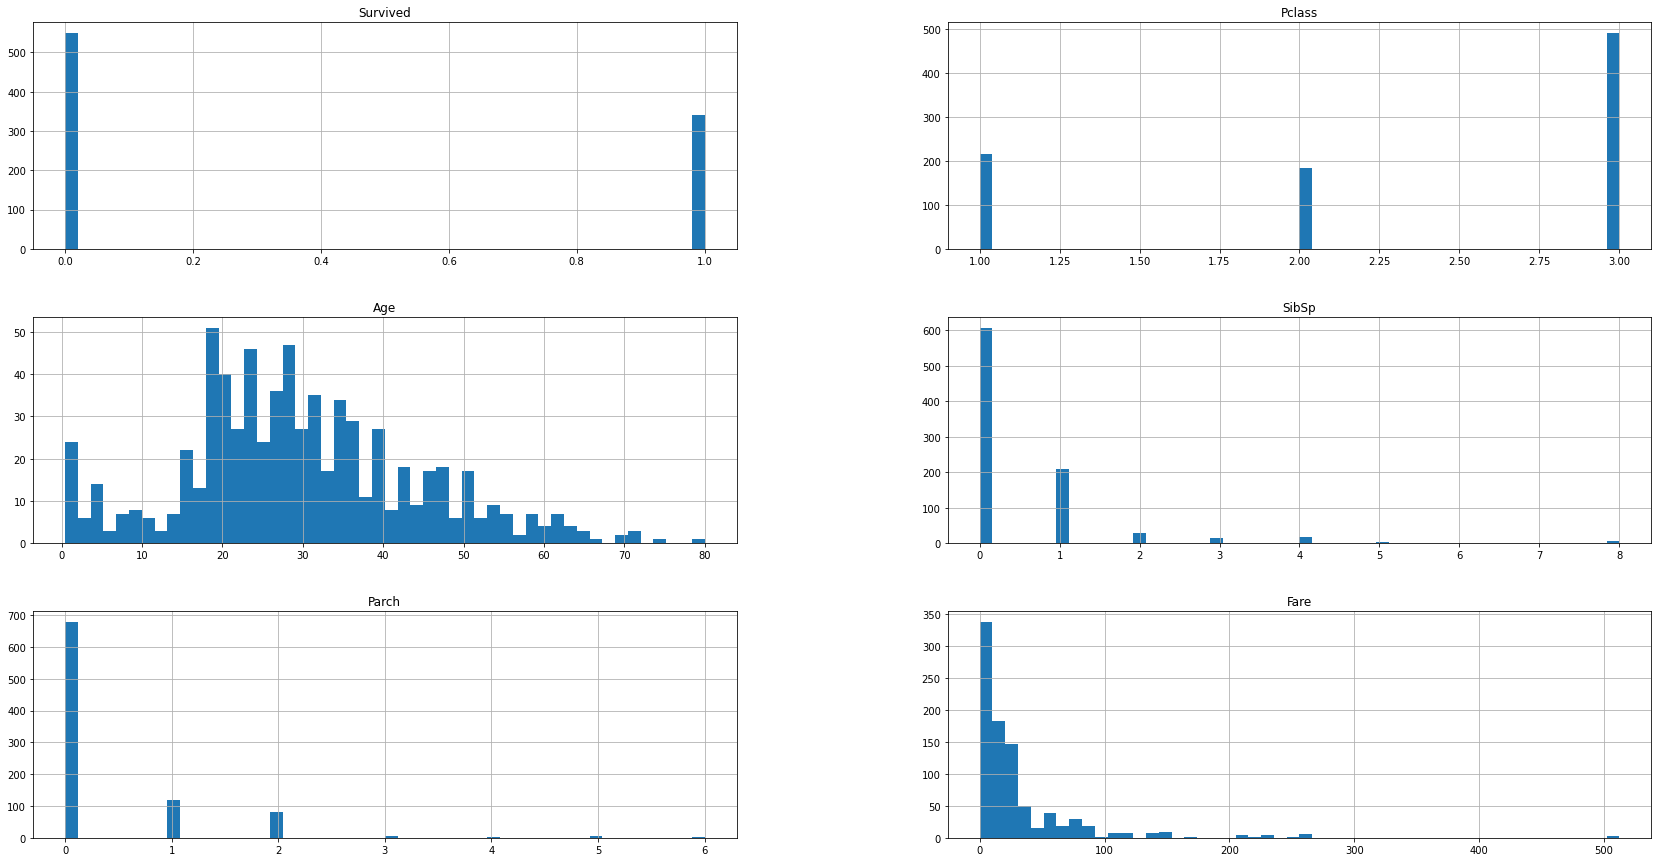

In [199]:
%matplotlib inline 
import matplotlib.pyplot as plt

X_train.hist(bins=50, figsize=(29,15))

In [200]:
y_train = X_train["Survived"].copy()
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

array([[<AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Fare', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Survived', ylabel='SibSp'>],
       [<AxesSubplot:xlabel=

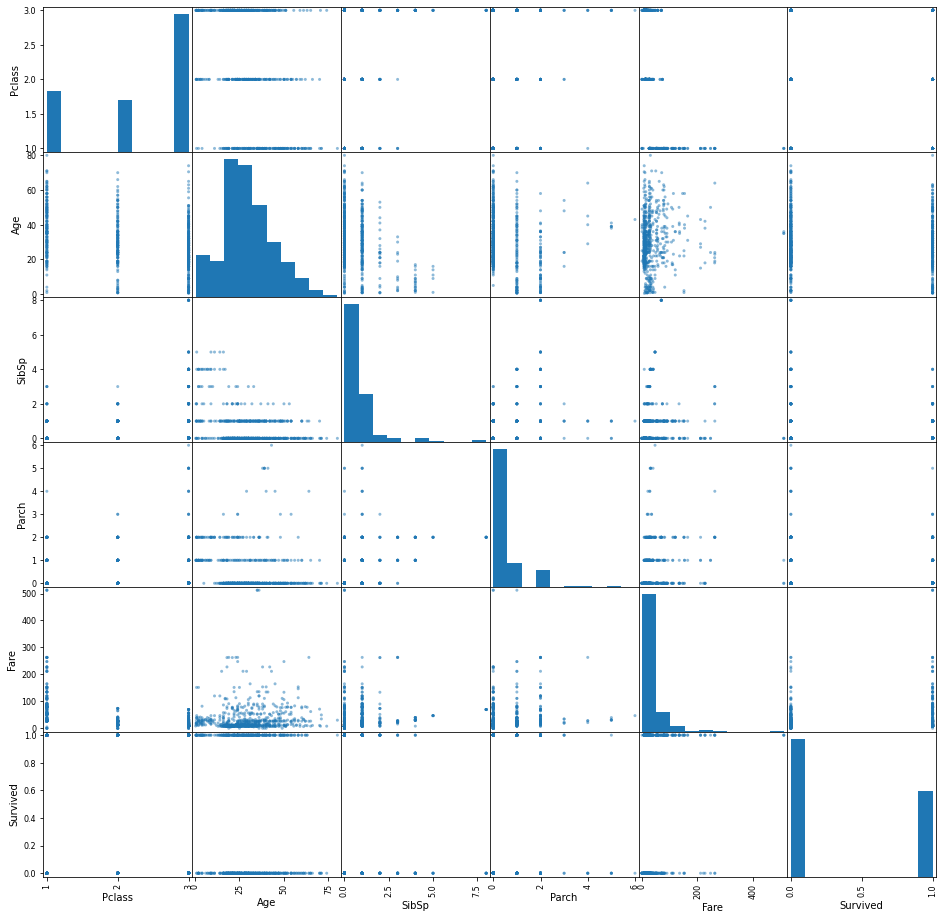

In [201]:
from pandas.plotting import scatter_matrix

attributes = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Survived"]
scatter_matrix(X_train[attributes], figsize=(16,16))



<AxesSubplot:xlabel='Age', ylabel='Survived'>

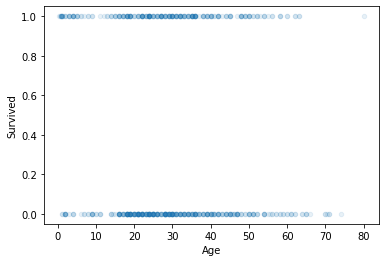

In [202]:

X_train.plot(kind="scatter", x="Age", y="Survived", alpha=0.1)

Prepare the data

In [203]:
X_train[X_train["Sex"]== "female"].value_counts()

Survived  Pclass  Name                                                      Sex     Age   SibSp  Parch  Ticket     Fare      Cabin            Embarked
0         1       Allison, Miss. Helen Loraine                              female  2.0   1      2      113781     151.5500  C22 C26          S           1
                  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)           female  25.0  1      2      113781     151.5500  C22 C26          S           1
1         1       Ryerson, Miss. Susan Parker "Suzette"                     female  21.0  2      2      PC 17608   262.3750  B57 B59 B63 B66  C           1
                  Ryerson, Miss. Emily Borie                                female  18.0  2      2      PC 17608   262.3750  B57 B59 B63 B66  C           1
                  Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)  female  33.0  0      0      110152     86.5000   B77              S           1
                                                                     

Imputer + Pipeline

In [204]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ])

Words to Number Pipeline

In [205]:
from sklearn.preprocessing import OneHotEncoder


cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

Combined the two pipeline with Column Transformer

In [206]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
    ])

Use the pipeline

In [207]:
X_train_prepared = full_pipeline.fit_transform(X_train[num_attribs + cat_attribs])

X_train_prepared

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

## Train with a classifier

In [208]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_prepared, y_train)
X_test_pred = full_pipeline.transform(X_test[num_attribs + cat_attribs])

prediction = log_reg.predict(X_test_pred)


In [209]:
from sklearn.model_selection import cross_val_score

log_scores = cross_val_score(log_reg, X_train_prepared, y_train, cv=10)
log_scores.mean()

0.7991260923845193

Random Forest Classifier

In [210]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(random_state=42)

In [211]:
new_list = num_attribs + cat_attribs

X_test_1 = full_pipeline.transform(X_test[new_list])
y_pred = forest_clf.predict(X_test_1)

In [212]:
forest_scores = cross_val_score(forest_clf, X_train_prepared, y_train, cv=10)
forest_scores.mean()

0.8092759051186016

In [213]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train_prepared, y_train, cv=10)
svm_scores.mean()


0.8249313358302123

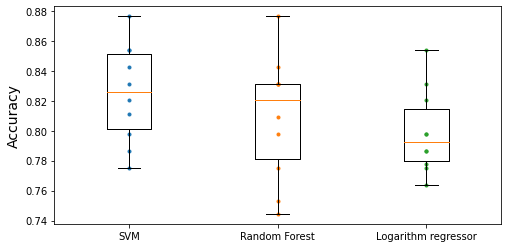

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.plot([3]*10, log_scores, ".")
plt.boxplot([svm_scores, forest_scores, log_scores], labels=("SVM","Random Forest", "Logarithm regressor"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

To improve : Tune hyperparameters using cross validation and grid search